# Confusion Matrix

In [1]:
import os 
import numpy as np
import tensorflow as tf
from tensorflow import keras as kr
from glob import glob
import matplotlib 
import matplotlib.pyplot as plt
import datetime

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


# Data to be evaluated on

In [2]:
DATA_DIR = "pics/NotTrainedOn/combined/DARK_Local_Classes/"
COLOR_MODE='rgb'
DIMENSION = (128, 128)

evaluate_samples = len(glob('%s/*/*.png' % DATA_DIR))
print(evaluate_samples)

2994


In [3]:
batchsize = 32
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_generator = eval_datagen.flow_from_directory(
        DATA_DIR,
        target_size=DIMENSION,
        batch_size=batchsize, #Divide the images into baches - 5 means into 5 batches
        color_mode=COLOR_MODE,
        class_mode='categorical',
        shuffle=False,
        seed=42)

Found 2994 images belonging to 5 classes.


# Model that should evaluate

In [4]:
DIR_MODEL = "Ausarbeitung/NN/keras/Network/kernel_size/OneSort/D_17_H_16_M_28_58725param_32batch_30epoch_AUGset1_combined_kernel_small1773smpl.h5"

H5_Filename = DIR_MODEL.split("/")
H5_Filename = H5_Filename[len(H5_Filename)-1]
H5_Filename = H5_Filename[0:len(H5_Filename)-3]
    
print(H5_Filename)

# D_25_H_22_M_02_S_34seq_net_312kp_32batch_60epoch_combined
# D_25_H_22_M_50_S_49seq_net_312kp_32batch_60epoch_seperation

D_17_H_16_M_28_58725param_32batch_30epoch_AUGset1_combined_kernel_small1773smpl


# Evaluation and Plotting of confusion Matrix

In [5]:
model = kr.models.load_model(DIR_MODEL)
generator = eval_generator
Y_pred=model.predict_generator(generator, generator.samples // batchsize + 1) # testVal_generator testTrain_generator
y_pred = np.argmax(Y_pred, axis=1)

Confusion Matrix


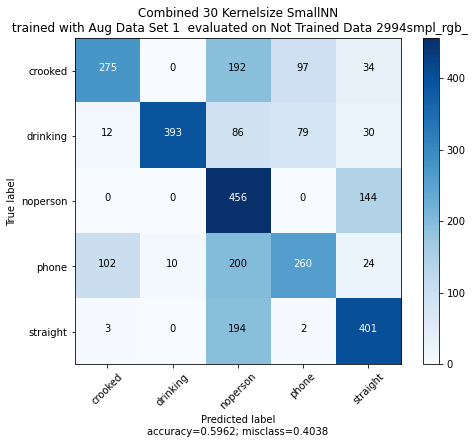

Classification Report
              precision    recall  f1-score   support

     crooked       0.70      0.46      0.56       598
    drinking       0.98      0.66      0.78       600
    noperson       0.40      0.76      0.53       600
       phone       0.59      0.44      0.50       596
    straight       0.63      0.67      0.65       600

    accuracy                           0.60      2994
   macro avg       0.66      0.60      0.60      2994
weighted avg       0.66      0.60      0.60      2994



In [6]:
DATE = datetime.datetime.now().strftime("%H%M")
TRAINED_WITH_CON = " trained with "
ON_CON = " evaluated on "

Type = "Combined 30 Kernelsize Small"
Evaluation_on = "Not Trained Data" + " " + str(evaluate_samples) + "smpl_" + COLOR_MODE + "_"
Trained_with = "Aug Data Set 1 "
Save_dir = "Ausarbeitung/Ausarbeitung_Graphen/Network/kernelsize/OneSort/"

FILENAME = Save_dir + Type.replace(" ", "_") + "_" + Trained_with.replace(" ", "_") + Evaluation_on.replace(" ", "_") + DATE + ".jpg"
TITLE = Type + "NN\n" + TRAINED_WITH_CON + Trained_with + ON_CON + Evaluation_on


from plot_confusion_matrix import plot_confusion_matrix
#y_true = list(range(len(generator.class_indices)))
#con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
classes = len(generator.class_indices)
if classes == 7:
    target_names = ['crookedBACK', 'crookedFRONT', 'drinking', 'noperson', 'phoneDOWN', 'phoneUP', 'straight']
elif classes == 5:
    target_names = ['crooked', 'drinking', 'noperson', 'phone', 'straight']

print('Confusion Matrix')
cm = confusion_matrix(generator.classes, y_pred)
plot_confusion_matrix(cm, 
                      normalize=False, 
                      target_names= target_names, 
                      title= TITLE, 
                      filename=FILENAME
                     )



    
print('Classification Report')
print(classification_report(generator.classes, y_pred, target_names=target_names))

# Evaluate Accurracy

In [7]:
LOGDIR = DIR_MODEL[0:len(DIR_MODEL)- 3]
from RunTB import run_tensorboard
run_tensorboard(LOGDIR)

# Log Accuracy